##### Decision Trees

they are high sensitive with changing the input data points

Trees split the values based on lowest Entropy
 
 
 
##### Random Forests
generating rendom data from the original dataset by Bootstrapping, then generating a tree for each random data with random features, best #of these random features are SQRT(features number)

then a decision is made by aggregating all the result for all the trees


Bagging = Bootstrapping + Aggregation




Random forests pros:
* Bootstrapping will reduce model variance

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score



df = pd.read_csv("kyphosis.csv")

df.head()

#Age column are in month (children ages)

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [2]:
# a function to replace absent/present column values with 0 and ones
def check(kyp):
    if kyp == 'absent':
        return 0
    elif kyp == 'present':
        return 1
    else: return 2




df['Kyphosis'] = df['Kyphosis'].apply(check)
df

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15
...,...,...,...,...
76,1,157,3,13
77,0,26,7,13
78,0,120,2,13
79,1,42,7,6


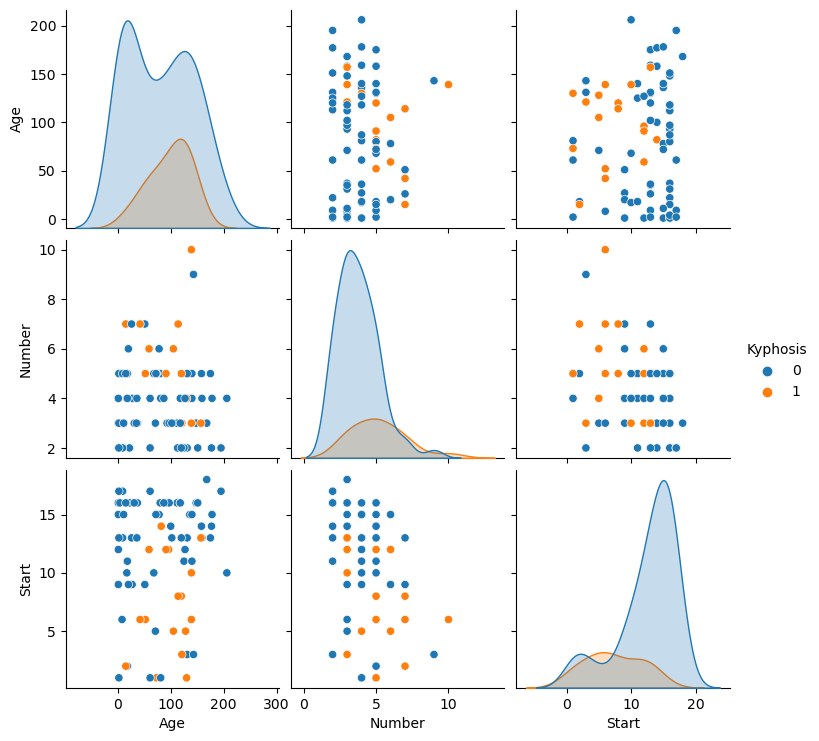

In [3]:
sns.pairplot(df, hue = 'Kyphosis')

<Axes: >

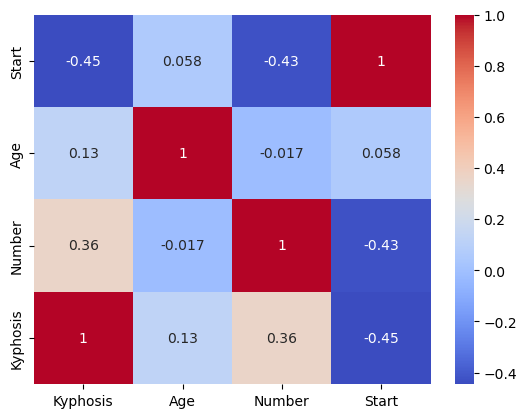

In [4]:
sns.heatmap(df.corr().sort_values('Kyphosis'), annot= True, cmap='coolwarm')

In [5]:
from sklearn.tree import DecisionTreeClassifier


X = df.drop('Kyphosis', axis= 1)
y = df['Kyphosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
dtree = DecisionTreeClassifier().fit(X_train,y_train)
predictions = dtree.predict(X_test)
print(classification_report(predictions, y_test))
confusion_matrix(predictions, y_test)

              precision    recall  f1-score   support

           0       0.71      0.67      0.69        18
           1       0.25      0.29      0.27         7

    accuracy                           0.56        25
   macro avg       0.48      0.48      0.48        25
weighted avg       0.58      0.56      0.57        25



array([[12,  6],
       [ 5,  2]], dtype=int64)

#### Trainning the model using Random Forest

In [6]:
X = df.drop('Kyphosis', axis= 1)
y = df['Kyphosis']
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
rfc = RandomForestClassifier().fit(X_train,y_train)
predictions = rfc.predict(X_test)
print(classification_report(predictions, y_test))
confusion_matrix(predictions, y_test)

              precision    recall  f1-score   support

           0       1.00      0.74      0.85        23
           1       0.25      1.00      0.40         2

    accuracy                           0.76        25
   macro avg       0.62      0.87      0.62        25
weighted avg       0.94      0.76      0.81        25



array([[17,  6],
       [ 0,  2]], dtype=int64)